In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Funtions Required

This function **ghost_2nd_order()** implements ghost node method to find the first value(next to initial value) and calculates all the other values using the second order time marching approach.\
The arguments are the values of $\alpha$ , $\beta$ , $t_f$  and  $\triangle t$.\
**Note:** &nbsp;1) The solutions are found from time $t = 0$ to $t = t_f$ (by default 5) \
&emsp;&emsp;&emsp;2) The errors are calculated with respect to true solution. \
**Ghost Method :** \
$$ \frac{du}{dt}|_{i = 0} = \frac{u_{1} - u_{-1}}{\triangle t}$$ \
$$ \frac{d^2u}{dt^2}|_{i = 0} = \frac{u_{1} - 2u_{0} + u_{-1}}{(\triangle t)^2}$$

In [3]:
def ghost_2nd_order(alpha,beta,t_f,dt):
    n = int(t_f/dt) + 1                 # no. of points 
    u = np.zeros(n)
    u[0] = alpha                      # initial condition
    for i in range(n-1):
        if (i == 0):                  # finding u1 value using ghost node. ghost node u_-1 was u1 - 2h*beta
            u[i+1] = (2 - ((alpha)**beta)*((dt)**2))*u[i]/2 + beta*dt
        else:                         # solving for rest of the points.
            u[i+1] = (2 - ((alpha)**beta)*((dt)**2))*u[i] - u[i-1]
    return u

The function **first_order_approx()** implements the usual second order finite difference method to find all the points from $u_2$.\
To find the value at  $u_1$ ,  it uses the forward difference scheme. $$ \frac{du}{dt}|_{i = 0} = \frac{u_{1}-u_{0}}{\triangle t}$$ \
$$ \frac{d^2u}{dt^2}|_{i = 1} = \frac{u_{2} - 2u_{1} + u_{0}}{(\triangle t)^2}$$
The arguments are same as the previous function.

In [4]:
def first_order_approx(alpha,beta,t_f,dt):
    n = int(t_f/dt) + 1
    u = np.zeros(n)
    u[0] = alpha
    u[1] = u[0] + beta*dt             # u1 value using forward difference applied at i = 1
    for i in range(1,n-1):            # solving for rest of the points.
        u[i+1] = (2 - ((alpha)**beta)*((dt)**2))*u[i] - u[i-1]
    return u        

This function **original_sol()** finds the true solution for the given equation.\
The given equation takes a **SHM** form with the **frequency being $$\omega = \alpha^{\frac{\beta}{2}}$$** \
Hence using the general solution $$u(t) = A\sin{\omega t} + B\cos{\omega t}$$ and initial conditions, the values of A and B were found. \
The arguments of this function are $\alpha, \beta, \triangle$t and the time array.

In [26]:
def original_sol(alpha,beta,t,t_f,dt):
    n = int(t_f/dt) + 1
    u = np.zeros(n)
    k = alpha**(beta/2)          # angular frequency
    A = beta/k                   # coefficients in true solution
    B = alpha
    u = A*np.sin(k*t) + B*np.cos(k*t)
    return u

## Ghost Node Method
Last two digits of my roll number: 21 $\implies \alpha = 21$ \
Since it is odd, the value of $\beta = -1$ \
**$\triangle $t = 1 :**

In [27]:
dt = 1                 # plotting solutions obtained by ghost method for h = 1
t_f = 5
n = int(t_f/dt)
t = np.linspace(0,t_f,n+1)
u = ghost_2nd_order(21,-1,t_f,dt)
u_true = original_sol(21,-1,t,t_f,dt)
errors = np.abs(u_true - u)

print(f"The maximum error for step size(h) = {dt} is {np.max(errors):.6f}.\n")

The maximum error for step size(h) = 1 is 0.069609.



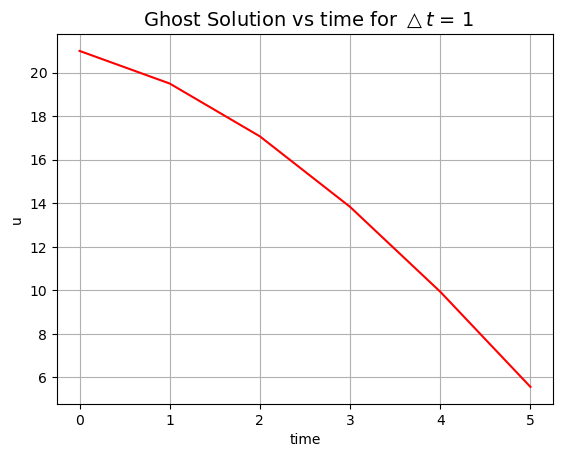

In [7]:
plt.title(rf" Ghost Solution vs time for $\triangle t$ = {dt}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,u,color = 'r')
plt.grid()

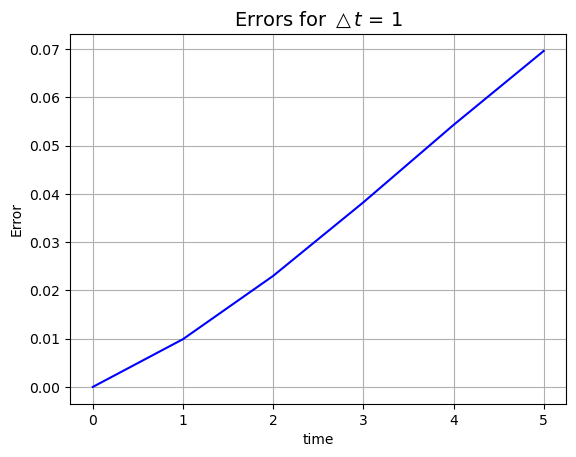

In [8]:
plt.title(rf"Errors for $\triangle t$ = {dt}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t,errors,color = 'b')
plt.grid()

**$\triangle$t = 0.1 :**

In [9]:
dt1 = 0.1
n1 = int(t_f/dt1)
t1 = np.linspace(0,t_f,n1+1)
u1 = ghost_2nd_order(21,-1,t_f,dt1)
utrue1 = original_sol(21,-1,t1,t_f,dt1)

errors1 = np.abs(utrue1 - u1)
print(f"The maximum error for step size(h) = {dt1} is {np.max(errors1):.6f}.\n")

The maximum error for step size(h) = 0.1 is 0.000691.



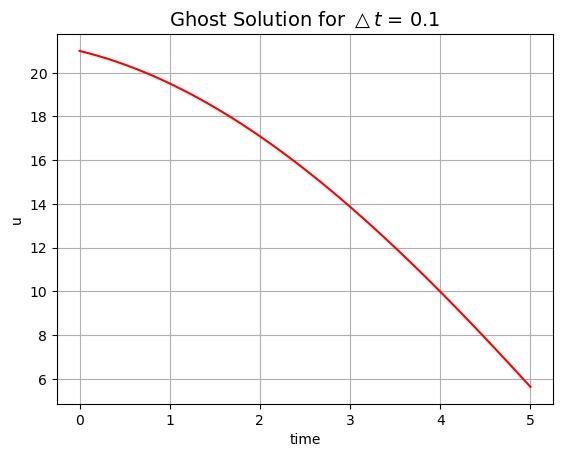

In [10]:
plt.title(rf"Ghost Solution for $\triangle t$ = {dt1}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t1,u1,color = 'r')
plt.grid()

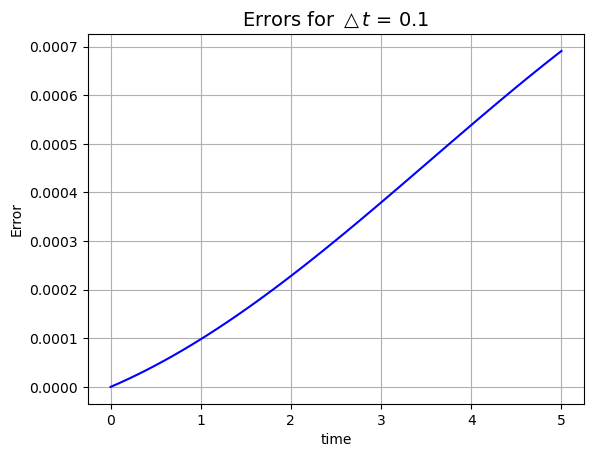

In [11]:
plt.title(rf"Errors for $\triangle t$ = {dt1}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t1,errors1,color = 'b')
plt.grid()

**$\triangle $t = 0.01 :**

In [14]:
dt2 = 0.01
n2 = int(t_f/dt2)
t2 = np.linspace(0,t_f,n2+1)
u2 = ghost_2nd_order(21,-1,t_f,dt2)
utrue2 = original_sol(21,-1,t2,t_f,dt2)

errors2 = np.abs(utrue2 - u2)
print(f"The maximum error for step size(h) = {dt2} is {np.max(errors2):.6f}.\n")

The maximum error for step size(h) = 0.01 is 0.000007.



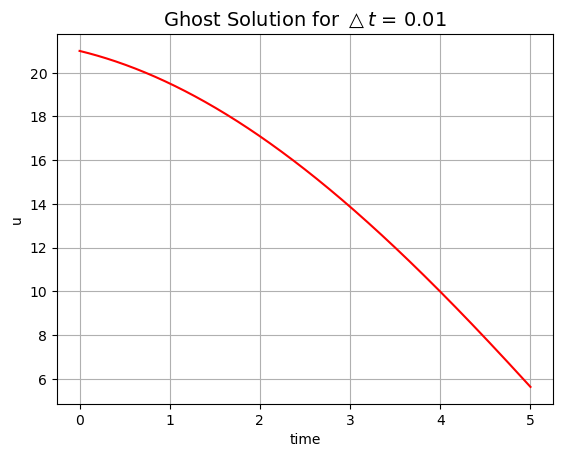

In [15]:
plt.title(rf"Ghost Solution for $\triangle t$ = {dt2}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t2,u2,color = 'r')
plt.grid()

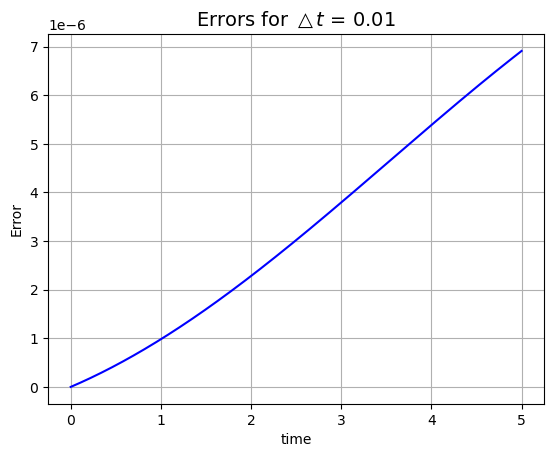

In [16]:
plt.title(rf"Errors for $\triangle t$ = {dt2}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t2,errors2,color = 'b')
plt.grid()

Upon reducing $\triangle$t from 1 to 0.1, the **maximum error reduced** from 0.069609 to 0.000691 which is nearly $\frac{1}{100}$ times the previous value. \
This suggests that the method used is of second order as the error reduced **by the order of $(\triangle t)^2$.**

## First Order Method
**$\triangle$t = 1 :**

In [17]:
uf = first_order_approx(21,-1,t_f,dt)
errorsf = np.abs(u_true - uf)

print(f"The maximum error for step size(h) = {dt} is {np.max(errorsf):.6f}.\n")

The maximum error for step size(h) = 1 is 1.977580.



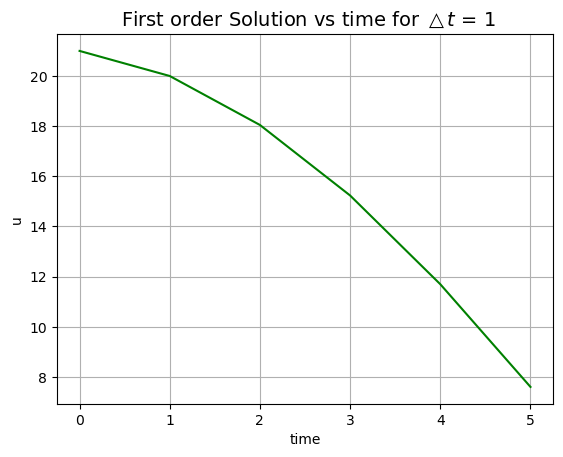

In [18]:
plt.title(rf" First order Solution vs time for $\triangle t$ = {dt}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t,uf,color = 'g')
plt.grid()

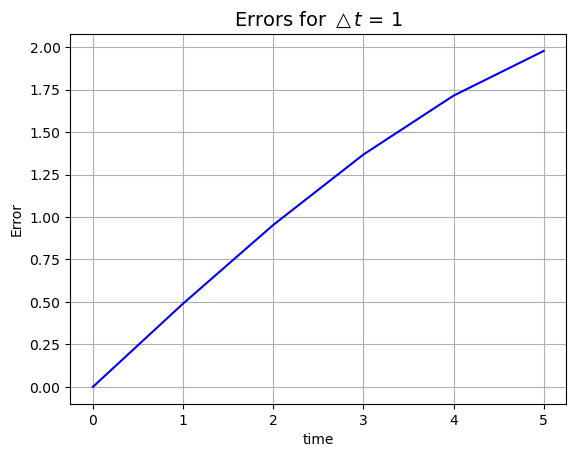

In [19]:
plt.title(rf"Errors for $\triangle t$ = {dt}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t,errorsf,color = 'b')
plt.grid()

We can observe that the error is much larger than the error of Ghost node method. \
The error is approximately **28 times** that of the Ghost method for $\triangle t = 1$.

**$\triangle$t = 0.1 :**

In [20]:
uf1 = first_order_approx(21,-1,t_f,dt1)
errorsf1 = np.abs(utrue1 - uf1)

print(f"The maximum error for step size(h) = {dt1} is {np.max(errorsf1):.6f}.\n")

The maximum error for step size(h) = 0.1 is 0.202590.



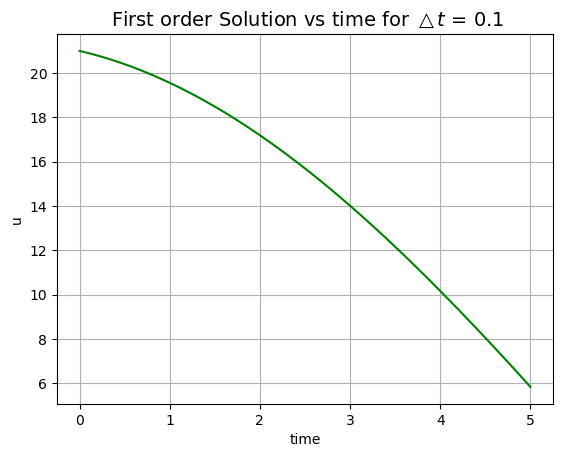

In [21]:
plt.title(rf" First order Solution vs time for $\triangle t$ = {dt1}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t1,uf1,color = 'g')
plt.grid()

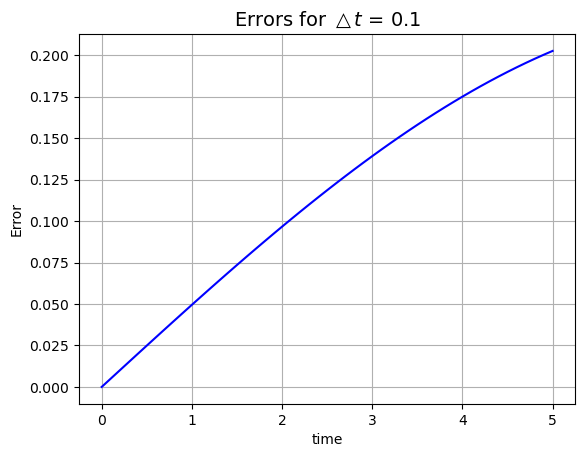

In [22]:
plt.title(rf"Errors for $\triangle t$ = {dt1}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t1,errorsf1,color = 'b')
plt.grid()

**$\triangle$t = 0.01 :**

In [23]:
uf2 = first_order_approx(21,-1,t_f,dt2)
errorsf2 = np.abs(utrue2 - uf2)

print(f"The maximum error for step size(h) = {dt2} is {np.max(errorsf2):.6f}.\n")

The maximum error for step size(h) = 0.01 is 0.020320.



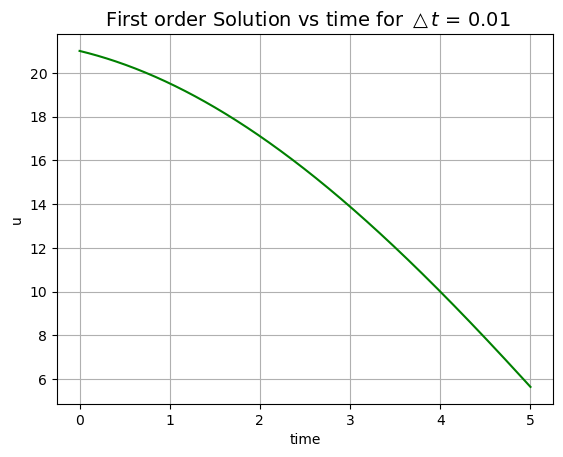

In [24]:
plt.title(rf" First order Solution vs time for $\triangle t$ = {dt2}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("u")
plt.plot(t2,uf2,color = 'g')
plt.grid()

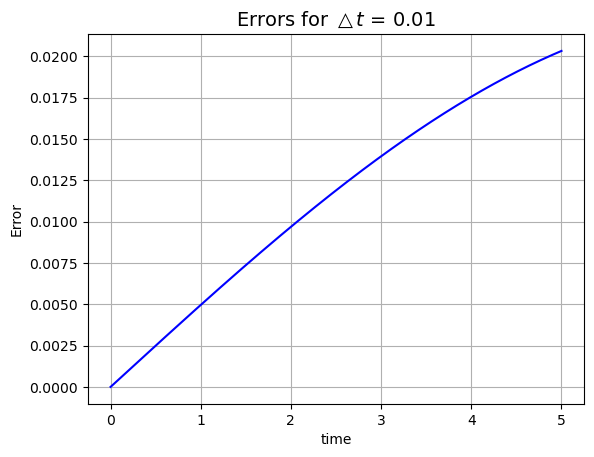

In [25]:
plt.title(rf"Errors for $\triangle t$ = {dt2}",fontsize = 14)
plt.xlabel("time")
plt.ylabel("Error")
plt.plot(t2,errorsf2,color = 'b')
plt.grid()

We can observe that in case of first order method, upon reducing the value of $\triangle$t by $\frac{1}{10}$ times, the error also reduced by nearly $\frac{1}{10}$ times, justifying that its **error reduces by the order of** $\triangle$t.

**Conclusion :** The ghost node method is more accurate than the first order method.